In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
from sklearn import metrics  
from sklearn.model_selection import train_test_split  
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer

In [28]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)


def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(app_train, col, title):
    df1 = app_train[app_train["TARGET"] == 1]
    df0 = app_train[app_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(app_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

#     layout = go.Layout(barmode='group', height=350, width=800, margin=dict(l=200), title = title)
#     fig = go.Figure(data=[trace1, trace2], layout=layout)
#     iplot(fig, filename='grouped-bar')

In [ ]:
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('expand_frame_repr', True)

In [3]:
#def load_kaggle_csv(filepath, root="E:/SparkExerciseData/Kaggle"):
def load_kaggle_csv(filepath, root="D:/wangh/Kaggle/HomeCredit/Data"):
    csv_path = os.path.join(root, filepath)
    return pd.read_csv(csv_path)

In [5]:
pd.set_option('display.max_columns', 500)
appl_data_train = load_kaggle_csv("application_train.csv")
appl_data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
appl_data_train.loc[appl_data_train['AMT_INCOME_TOTAL'] >10000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.460809,0.113161,0.145543,0.1031,0.0947,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0688,NaN,0.0615,NaN,NaN,0.105,0.0983,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0704,NaN,0.0641,NaN,NaN,0.1041,0.0947,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.07,NaN,0.0626,NaN,NaN,NaN,block of flats,0.0715,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,-15704,-4961,-3338.0,-4728,7.0,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.543417,0.788606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1133.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,-13551,-280,-3953.0,-4972,10.0,1,1,1,1,0,0,NaN,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.713507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
appl_data_train=appl_data_train[appl_data_train['AMT_INCOME_TOTAL'] <10000000]

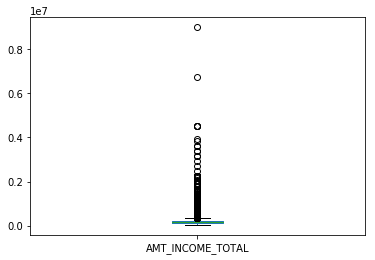

In [8]:
appl_data_train["AMT_INCOME_TOTAL"].plot.box()

In [9]:
appl_corr=appl_data_train.corr().sort_values('TARGET', axis=0)
appl_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
EXT_SOURCE_3,0.000210,-0.178898,-0.042705,-0.067128,0.043516,0.030752,0.047715,-0.006007,-0.205473,0.113432,-0.107553,-0.131601,-0.014604,NaN,-0.115290,-0.063622,0.012134,0.002604,-0.052174,-0.027957,-0.012904,-0.012158,-0.040513,-0.049163,-0.049145,-0.029605,-0.078480,-0.079734,-0.044314,0.186845,0.109153,1.000000,0.005713,0.009233,-0.000405,0.015680,-0.003188,0.007357,0.012277,0.003517,0.001865,0.010751,0.004059,0.005628,0.006777,-0.002336,0.004878,0.008081,-0.000611,0.015123,-0.002645,0.007062,0.010913,0.004373,0.003084,0.009399,0.004378,0.005431,0.006122,-0.002665,0.005536,0.009350,0.000169,0.015386,-0.003321,0.007388,0.012190,0.003802,0.001825,0.010726,0.003804,0.005480,0.006302,-0.002876,0.006228,-0.000423,-0.036255,-0.000722,-0.034098,-0.075248,NaN,-0.030691,0.003193,-0.005600,0.074969,0.000467,-0.016329,-0.006359,-0.003951,-0.010600,0.001161,0.000445,-0.001345,0.000839,0.002469,0.001200,-0.016153,-0.002590,-0.013837,-0.013058,-0.001193,-0.007190,-0.021259,-0.007858,-0.025134,-0.071453
EXT_SOURCE_2,0.002325,-0.160451,-0.018018,0.149559,0.131222,0.125779,0.139359,0.198916,-0.091994,-0.020767,-0.059920,-0.050949,-0.080747,NaN,0.019458,-0.018851,-0.003544,0.061179,0.023744,-0.001825,-0.292899,-0.288303,0.156857,0.015571,0.029517,0.030050,-0.043266,-0.075971,-0.058900,0.213983,1.000000,0.109153,0.090971,0.048341,0.009067,0.012912,0.053587,0.115051,0.032498,0.135860,0.112255,0.022271,0.080307,0.097575,0.019880,0.045083,0.080496,0.037685,0.008164,0.010088,0.044244,0.106173,0.023781,0.130113,0.106694,0.017316,0.071332,0.086022,0.016856,0.037313,0.089293,0.046953,0.009036,0.012618,0.052269,0.113460,0.031245,0.134608,0.111369,0.021228,0.078703,0.096077,0.018791,0.042640,0.094685,-0.019237,-0.030406,-0.018879,-0.032340,-0.195762,0.000899,-0.030694,0.003036,0.004250,-0.018707,-0.000587,0.050685,0.016641,-0.002061,-0.004368,0.002188,0.023794,0.021027,0.008418,0.013030,0.002594,0.001874,0.003256,0.000614,-0.007236,-0.004078,0.000552,0.001506,0.051979,-0.002852,-0.021988
EXT_SOURCE_1,0.000079,-0.155319,-0.138474,0.085724,0.168429,0.119398,0.175502,0.099

In [10]:
bar_hor(appl_data_train, "TARGET", "Distribution of Target Variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['Target : 1','Target : 0'])

In [11]:
appl_data_train["TARGET"].value_counts()

0    282684
1     24824
Name: TARGET, dtype: int64

In [12]:
tr0 = bar_hor(appl_data_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp(appl_data_train, 'CODE_GENDER', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

In [13]:
tr0 = bar_hor(appl_data_train, "NAME_FAMILY_STATUS", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp(appl_data_train,'NAME_FAMILY_STATUS', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Family Status Distribution" , "Family Status, Target = 1" ,"Family Status, Target = 0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

In [4]:
app_train = load_kaggle_csv("application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
bureau = load_kaggle_csv("bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
bureau_balance = load_kaggle_csv("bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
credit_card_balance = load_kaggle_csv("credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [8]:
pcb = load_kaggle_csv("POS_CASH_balance.csv")
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [9]:
previous_application = load_kaggle_csv("previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
installments_payments = load_kaggle_csv("installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [11]:
app_test = load_kaggle_csv('application_test.csv')
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

In [13]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(data, data_cats)

In [14]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_test,is_train
0,100002,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,100003,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,100004,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,100006,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,100007,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [15]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,1803195,182943,-31,48.0,45.0,Active,0,0,1,0,0,0,0,0,0,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0,1,0,0,0,0,0,0,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0,1,0,0,0,0,0,0,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0,1,0,0,0,0,0,0,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0,1,0,0,0,0,0,0,0,0


In [16]:
## More Feature Ideas Reference : https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm 

## count the number of previous applications for a given ID
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['SK_ID_PREV'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])

## Average values for all other features in previous applications
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

In [17]:
## count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['SK_ID_PREV'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

## Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]
data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

In [18]:
### count the number of pos cash for a given ID
pcb_count = pcb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pcb['SK_ID_PREV'] = pcb['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])

## Average Values for all other variables in pos cash
pcb_avg = pcb.groupby('SK_ID_CURR').mean()
data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')

In [19]:
### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['SK_ID_PREV'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

### average of all other columns 
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

In [26]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,cc_bal_NAME_CONTRACT_STATUS_Active,cc_bal_NAME_CONTRACT_STATUS_Approved,cc_bal_NAME_CONTRACT_STATUS_Completed,cc_bal_NAME_CONTRACT_STATUS_Demand,cc_bal_NAME_CONTRACT_STATUS_Refused,cc_bal_NAME_CONTRACT_STATUS_Sent proposal,cc_bal_NAME_CONTRACT_STATUS_Signed
0,100002,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#### prepare final Train X and Test X dataframes 
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]

trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

In [33]:
data.mean()

SK_ID_CURR                                                       2.781280e+05
NAME_CONTRACT_TYPE                                               8.341778e-02
CODE_GENDER                                                      6.600160e-01
FLAG_OWN_CAR                                                     3.397005e-01
FLAG_OWN_REALTY                                                  3.067606e-01
CNT_CHILDREN                                                     4.143156e-01
AMT_INCOME_TOTAL                                                 1.701161e+05
AMT_CREDIT                                                       5.877674e+05
AMT_ANNUITY                                                      2.742556e+04
AMT_GOODS_PRICE                                                  5.280200e+05
NAME_TYPE_SUITE                                                  2.700678e-01
NAME_INCOME_TYPE                                                 1.082009e+00
NAME_EDUCATION_TYPE                                             

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in split.split(trainX, Y):
    strat_trainX = trainX.loc[train_index]
    strat_Y = Y.loc[train_index]
    strat_trainX_val = trainX.loc[test_index]
    strat_Y_val = Y.loc[test_index]

In [23]:
 strat_trainX.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,cc_bal_NAME_CONTRACT_STATUS_Active,cc_bal_NAME_CONTRACT_STATUS_Approved,cc_bal_NAME_CONTRACT_STATUS_Completed,cc_bal_NAME_CONTRACT_STATUS_Demand,cc_bal_NAME_CONTRACT_STATUS_Refused,cc_bal_NAME_CONTRACT_STATUS_Sent proposal,cc_bal_NAME_CONTRACT_STATUS_Signed
102007,0,1,0,0,0,81000.0,604152.0,24088.5,540000.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71591,0,1,0,0,0,400500.0,1076247.0,45598.5,990000.0,0,...,13.931034,0.258065,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.00000
254194,0,0,0,1,0,130500.0,187704.0,13729.5,148500.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39957,0,1,0,0,0,90000.0,135000.0,14305.5,135000.0,0,...,0.000000,0.000000,0.0,0.976190,0.0,0.000000,0.0,0.0,0.0,0.02381
31095,1,1,0,0,0,270000.0,540000.0,27000.0,540000.0,0,...,45.621053,0.000000,0.0,0.978947,0.0,0.021053,0.0,0.0,0.0,0.00000


In [36]:
strat_trainX.dtypes

NAME_CONTRACT_TYPE                                                 int64
CODE_GENDER                                                        int64
FLAG_OWN_CAR                                                       int64
FLAG_OWN_REALTY                                                    int64
CNT_CHILDREN                                                       int64
AMT_INCOME_TOTAL                                                 float64
AMT_CREDIT                                                       float64
AMT_ANNUITY                                                      float64
AMT_GOODS_PRICE                                                  float64
NAME_TYPE_SUITE                                                    int64
NAME_INCOME_TYPE                                                   int64
NAME_EDUCATION_TYPE                                                int64
NAME_FAMILY_STATUS                                                 int64
NAME_HOUSING_TYPE                                  

In [24]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(data[relevant_features])
strat_trainX_mean = imp.transform(strat_trainX)
strat_trainX_val_mean = imp.transform(strat_trainX_val)

In [27]:
strat_trainX_mean

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          1.99322270e-06,   5.92932770e-05,   3.58310111e-03],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.99322270e-06,   5.92932770e-05,   3.58310111e-03],
       ..., 
       [  0.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.99322270e-06,   5.92932770e-05,   3.58310111e-03],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          1.99322270e-06,   5.92932770e-05,   3.58310111e-03],
       [  0.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.99322270e-06,   5.92932770e-05,   3.58310111e-03]])

In [43]:
log_clf = LogisticRegression(penalty='l1', 
                             C=1, random_state=27)


log_clf.fit(strat_trainX_mean, strat_Y)

log_y_pred = log_clf.predict(strat_trainX_val_mean)
log_y_pred_prob = log_clf.predict_proba(strat_trainX_val_mean)[:,1]

print(log_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, log_y_pred))
print(log_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, log_y_pred_prob))

NameError: name 'clf' is not defined

In [44]:
print(log_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, log_y_pred))
print(log_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, log_y_pred_prob))

LogisticRegression Accuracy Score: 0.918979561973
LogisticRegression AUC Score: 0.759659311028


In [ ]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=232,
       n_jobs=1, nthread=4, objective=u'binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=False, subsample=0.8)
xgb_clf.fit(strat_trainX, strat_Y)

xgb_y_pred = xgb_clf.predict(strat_trainX_val)
xgb_y_pred_prob = xgb_clf.predict_proba(strat_trainX_val)[:,1]

print(xgb_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, xgb_y_pred))
print(xgb_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, xgb_y_pred_prob))

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=15, max_features=8, bootstrap=True, n_jobs=-1, random_state=27)

rnd_y_pred = rnd_clf.predict(strat_trainX_val) rnd_y_pred_prob = rnd_clf.predict_proba(strat_trainX_val)[:,1]

print(rnd_clf.class.name, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, rnd_y_pred)) 
print(rnd_clf.class.name, "AUC Score:", metrics.roc_auc_score(strat_Y_val, rnd_y_pred_prob))

In [30]:
import lightgbm as lgb
lgb_train = lgb.Dataset(data=strat_trainX, label=strat_Y)
lgb_eval = lgb.Dataset(data=strat_trainX_val, label=strat_Y_val)
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 10 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
lgb_clf = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.741605
[400]	valid_0's auc: 0.755352
[600]	valid_0's auc: 0.765173
[800]	valid_0's auc: 0.769797
[1000]	valid_0's auc: 0.772184
[1200]	valid_0's auc: 0.773289
[1400]	valid_0's auc: 0.773774
[1600]	valid_0's auc: 0.774068
[1800]	valid_0's auc: 0.774624
[2000]	valid_0's auc: 0.774773
[2200]	valid_0's auc: 0.774923
[2400]	valid_0's auc: 0.775035
[2600]	valid_0's auc: 0.775078
Early stopping, best iteration is:
[2530]	valid_0's auc: 0.775139


In [ ]:
lgb_clf

In [ ]:
lgb_y_pred = lgb_clf.predict(strat_trainX_val_mean)
lgb_y_pred_prob = lgb_clf.predict_proba(strat_trainX_val_mean)[:,1]

print(lgb_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, lgb_y_pred))
print(lgb_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, lgb_y_pred_prob))

In [ ]:
def modelfit(alg, dtrain, dtrain_target, dtest, dtest_target, useTrainCV=True, cv_folds=5, early_stopping_rounds=150):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, label=dtrain_target.values)
        #xgtest = xgb.DMatrix(dtest.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics={'auc'}, early_stopping_rounds=early_stopping_rounds)
        print("n_estimators use : %d" % cvresult.shape[0])
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, dtrain_target,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print("\ndtrain Model Report")
    print("dtrain Accuracy : %.4g" % metrics.accuracy_score(dtrain_target, dtrain_predictions))
    print("dtrain AUC Score: %f" % metrics.roc_auc_score(dtrain_target, dtrain_predprob))
    
    
    
#     Predict on testing data:
    #Predict training set:
    dtest_predictions = alg.predict(dtest)
    dtest_predprob = alg.predict_proba(dtest)[:,1]
        
    #Print model report:
    print("\ndtest Model Report")
    print("dtest Accuracy : %.4g" % metrics.accuracy_score(dtest_target, dtest_predictions))
    print("dtest AUC Score: %f" % metrics.roc_auc_score(dtest_target, dtest_predprob))

In [32]:
xgb1 = xgb.XGBClassifier(
        learning_rate=0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        silent=False,    
        seed=27)
modelfit(xgb1, strat_trainX, strat_Y, strat_trainX_val, strat_Y_val)

n_estimators use : 226

dtrain Model Report
dtrain Accuracy : 0.923
dtrain AUC Score: 0.838106

dtest Model Report
dtest Accuracy : 0.9195
dtest AUC Score: 0.774648


In [33]:
xgb1.get_params()['n_estimators']

226

In [34]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=xgb1.get_params()['n_estimators'], 
                                        max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
                                                          silent=False,  seed=27, verbose=10), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,verbose=10,iid=False, cv=5)
gsearch1.fit(strat_trainX, strat_Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 40.6min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 49.7min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 74.6min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 97.9min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 142.3min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 186.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 263.2min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 302.2min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 302.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=226,
       n_jobs=1, nthread=4, objective=u'binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=False, subsample=0.8, verbose=10),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={u'max_depth': [3, 5, 7, 9], u'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'roc_auc', verbose=10)

In [35]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77344, std: 0.00582, params: {u'max_depth': 3, u'min_child_weight': 1},
  mean: 0.77356, std: 0.00563, params: {u'max_depth': 3, u'min_child_weight': 3},
  mean: 0.77376, std: 0.00575, params: {u'max_depth': 3, u'min_child_weight': 5},
  mean: 0.77431, std: 0.00600, params: {u'max_depth': 5, u'min_child_weight': 1},
  mean: 0.77512, std: 0.00559, params: {u'max_depth': 5, u'min_child_weight': 3},
  mean: 0.77580, std: 0.00564, params: {u'max_depth': 5, u'min_child_weight': 5},
  mean: 0.77087, std: 0.00607, params: {u'max_depth': 7, u'min_child_weight': 1},
  mean: 0.77214, std: 0.00619, params: {u'max_depth': 7, u'min_child_weight': 3},
  mean: 0.77148, std: 0.00540, params: {u'max_depth': 7, u'min_child_weight': 5},
  mean: 0.76444, std: 0.00579, params: {u'max_depth': 9, u'min_child_weight': 1},
  mean: 0.76487, std: 0.00691, params: {u'max_depth': 9, u'min_child_weight': 3},
  mean: 0.76713, std: 0.00651, params: {u'max_depth': 9, u'min_child_weight': 5}],
 {u'max_depth':

In [38]:
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=xgb1.get_params()['n_estimators'],
                                                  max_depth=gsearch1.best_params_['max_depth'],
                                        min_child_weight=gsearch1.best_params_['min_child_weight'],
                                                  gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,
                                                  silent=False, seed=27), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False,verbose=10, cv=5)
gsearch3.fit(strat_trainX, strat_Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 30.9min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 46.5min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 73.5min
[Parallel(n_jobs=4)]: Done  21 out of  25 | elapsed: 199.9min remaining: 38.1min
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 207.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=226,
       n_jobs=1, nthread=4, objective=u'binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=False, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={u'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'roc_auc', verbose=10)

In [ ]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.77580, std: 0.00564, params: {u'gamma': 0.0},
  mean: 0.77611, std: 0.00543, params: {u'gamma': 0.1},
  mean: 0.77583, std: 0.00540, params: {u'gamma': 0.2},
  mean: 0.77595, std: 0.00546, params: {u'gamma': 0.3},
  mean: 0.77586, std: 0.00540, params: {u'gamma': 0.4}],
 {u'gamma': 0.1},
 0.77611463544021908)

In [ ]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, 
                                                  max_depth=gsearch1.best_params_['max_depth'],
                                        min_child_weight=gsearch1.best_params_['min_child_weight'],
                                                  gamma=gsearch3.best_params_['gamma'], 
                                        subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=2, verbose=10,silent=False,
                                                  scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(strat_trainX, strat_Y)

In [ ]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=232,
                                                  max_depth=gsearch1.best_params_['max_depth'],
                                        min_child_weight=gsearch1.best_params_['min_child_weight'],
                                                  gamma=gsearch3.best_params_['gamma'],  
                                                  subsample=gsearch4.best_params_["subsample"], 
                                        colsample_bytree=gsearch4.best_params_["colsample_bytree"],
                                                  silent=False,
                                        objective= 'binary:logistic', nthread=2, verbose=10,
                                                  scale_pos_weight=1,seed=27), 
                       param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(strat_trainX, strat_Y)

In [ ]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

In [ ]:
xgb3 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth==gsearch1.best_params_['max_depth'],
        min_child_weight=gsearch1.best_params_['min_child_weight'],
        gamma=gsearch3.best_params_['gamma'], 
        subsample=gsearch4.best_params_["subsample"],
        colsample_bytree=gsearch4.best_params_["colsample_bytree"],
        reg_alpha=gsearch6.best_params_["reg_alpha"],
        objective= 'binary:logistic',
        nthread=8,
        scale_pos_weight=1,
        silent=False,
        seed=27)
modelfit(xgb3, strat_trainX, strat_Y, strat_trainX_val, strat_Y_val)

In [ ]:
xgb3

In [ ]:
xgb4 = XGBClassifier(
        learning_rate =0.01,
        n_estimators=5000,
        max_depth==gsearch1.best_params_['max_depth'],
        min_child_weight=gsearch1.best_params_['min_child_weight'],
        gamma=gsearch3.best_params_['gamma'],
        subsample=gsearch4.best_params_["subsample"],
        colsample_bytree=gsearch4.best_params_["colsample_bytree"],
        reg_alpha=gsearch6.best_params_["reg_alpha"],
        objective= 'binary:logistic',
        nthread=8,
        silent=False,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb4, strat_trainX, strat_Y, strat_trainX_val, strat_Y_val)

In [ ]:
xgb4

In [ ]:
xgb_clf = xgb4

In [ ]:
xgb_clf = xgb4

xgb_clf.fit(strat_trainX, strat_Y)

xgb_y_pred = xgb_clf.predict(strat_trainX_val)
xgb_y_pred_prob = xgb_clf.predict_proba(strat_trainX_val)[:,1]

print(xgb_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, xgb_y_pred))
print(xgb_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, xgb_y_pred_prob))

In [ ]:
log_param_grid = {'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1,10] }
log_grid_search = GridSearchCV(LogisticRegression(), log_param_grid, cv=5,
                           scoring='roc_auc', return_train_score=True, verbose=10,n_jobs=8,iid=False)

log_grid_search.fit(strat_trainX, strat_Y)
log_grid_search.grid_scores_, log_grid_search.best_params_, log_grid_search.best_score_

In [ ]:
log_clf = LogisticRegression(penalty=log_grid_search.best_params_['penalty'], 
                             C=log_grid_search.best_params_['C'], random_state=27)


log_clf.fit(strat_trainX_mean, strat_Y)

log_y_pred = log_clf.predict(strat_trainX_val_mean)
log_y_pred_prob = log_clf.predict_proba(strat_trainX_val_mean)[:,1]

print(log_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, log_y_pred))
print(log_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, log_y_pred_prob))

In [ ]:
rnd_clf = RandomForestClassifier(random_state=27)

rnd_param_grid = [
   # {'n_estimators': range(600,1000,100), 'max_features': range(18,30, 2), 'max_leaf_nodes':range(28, 40, 2)}
    {'n_estimators': 1000, 'max_features': range(18,30, 5), 'max_leaf_nodes':range(28, 40, 5)}
  ]

rnd_grid_search = GridSearchCV(rnd_clf, rnd_param_grid, cv=5,
                           scoring='roc_auc', return_train_score=True, verbose=10,n_jobs=8,iid=False)
rnd_grid_search.fit(strat_trainX, strat_Y)
rnd_grid_search.grid_scores_, rnd_grid_search.best_params_, rnd_grid_search.best_score_

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=rnd_grid_search.best_params_["n_estimators"], 
                        max_leaf_nodes=rnd_grid_search.best_params_["max_leaf_nodes"], 
                        max_features=rnd_grid_search.best_params_["max_features"], 
                        bootstrap=True, n_jobs=-1, random_state=27)

rnd_clf.fit(strat_trainX, strat_Y)

rnd_y_pred = rnd_clf.predict(strat_trainX_val)
rnd_y_pred_prob = rnd_clf.predict_proba(strat_trainX_val)[:,1]

print(rnd_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, rnd_y_pred))
print(rnd_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, rnd_y_pred_prob))

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=50)
for train_index, test_index in split.split(strat_trainX_val, strat_Y_val):
    strat_trainX_val_l2train = strat_trainX_val.loc[train_index]
    strat_Y_val_l2train = strat_Y_val.loc[train_index]
    strat_trainX_val_l2test = strat_trainX_val.loc[test_index]
    strat_Y_val_l2test = strat_Y_val.loc[test_index]
    
seclvl_train = np.concatenate(( np.array([log_clf.predict_proba(strat_trainX_val_l2train)[:,1]]).T,
                                np.array([rnd_clf.predict_proba(strat_trainX_val_l2train)[:,1]]).T,
                                np.array([xgb_clf.predict_proba(strat_trainX_val_l2train)[:,1]]).T,
                                np.array([lgb_clf.predict_proba(strat_trainX_val_l2train)[:,1]]).T
                            ), axis=1)
seclvl_test = np.concatenate((  np.array([log_clf.predict_proba(strat_trainX_val_l2test)[:,1]]).T,
                                np.array([rnd_clf.predict_proba(strat_trainX_val_l2test)[:,1]]).T,
                                np.array([xgb_clf.predict_proba(strat_trainX_val_l2test)[:,1]]).T,
                                np.array([lgb_clf.predict_proba(strat_trainX_val_l2test)[:,1]]).T,
                             ), axis=1)  

In [ ]:
gbm = xgb.XGBClassifier(
 learning_rate = 0.02,
 n_estimators= 1000,
 max_depth= 4,
 min_child_weight= 2,
 gamma=0,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(seclvl_train, strat_Y_val_l2train)
predictions = gbm.predict(seclvl_test)
predictions_prob = gbm.predict_proba(seclvl_test)[:,1]
print("Accuracy Score:", metrics.accuracy_score(strat_Y_val_l2test, predictions))
print("AUC Score:", metrics.roc_auc_score(strat_Y_val_l2test, predictions_prob))